In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [np.float64(6.0), np.float64(5.1), np.float64(5.9), np.float64(5.6), np.float64(5.8), np.float64(6.6), np.float64(4.5), np.float64(6.3), np.float64(5.8), np.float64(6.1), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(5.0), np.float64(5.1), np.float64(5.3), np.float64(5.5), np.float64(6.7), np.float64(6.9), np.float64(5.0), np.float64(5.7), np.float64(4.9), np.float64(6.7), np.float64(4.9), np.float64(5.7), np.float64(6.0), np.float64(4.8), np.float64(4.9), np.float64(5.6), np.float64(5.8), np.float64(6.1), np.float64(6.4), np.float64(5.6), np.float64(5.1), np.float64(5.6), np.float64(6.1), np.float64(5.6), np.float64(5.5), np.float64(4.8), np.float64(5.4), np.float64(5.6), np.float64(5.1), np.float64(5.1), np.float64(5.9), np.float64(5.7), np.float64(5.2), np.float64(5.0), np.float64(5.2), np.float64(5.4), np.float64(5.1)]
sepal length(꽃받침의 길이) [np.float64(6.3), np.float64(5.8), np.float64(7.1), np.float64(6.3), np.float64(6.5), np.float64(7.6), np.f

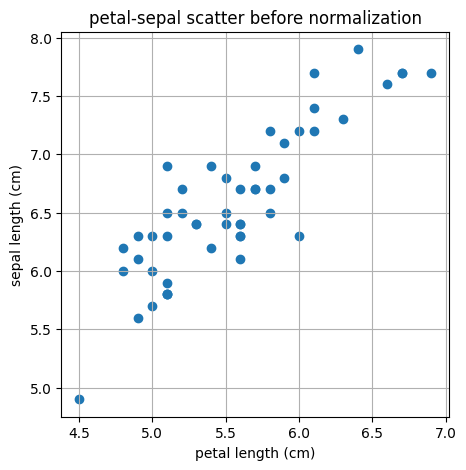

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

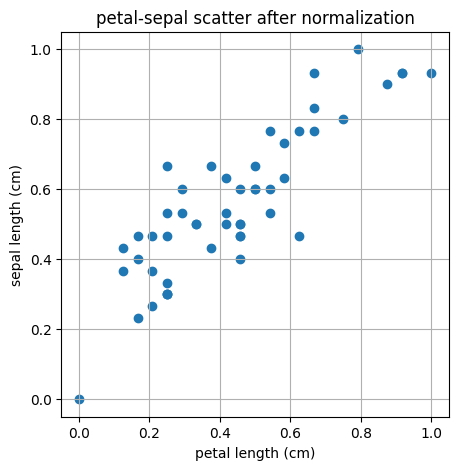

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다.
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다.
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


/tmp/ipython-input-1003918429.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))


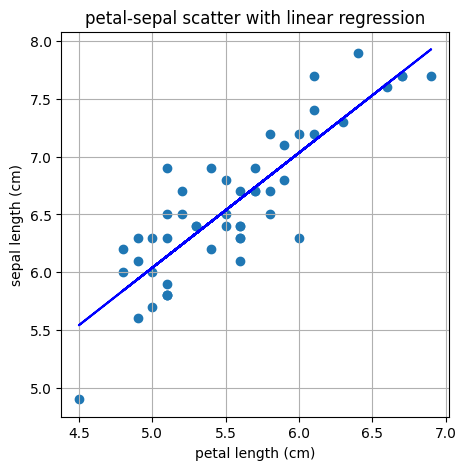

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


/tmp/ipython-input-1326011481.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))


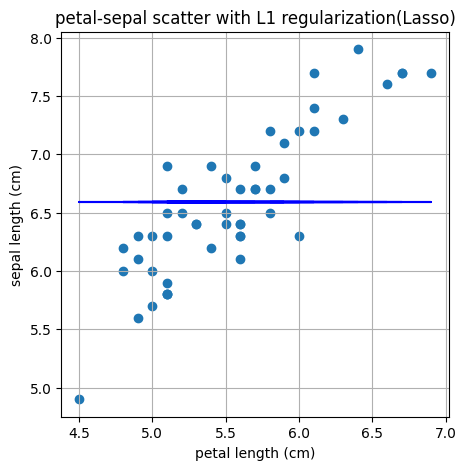

In [7]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


/tmp/ipython-input-1260719005.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))


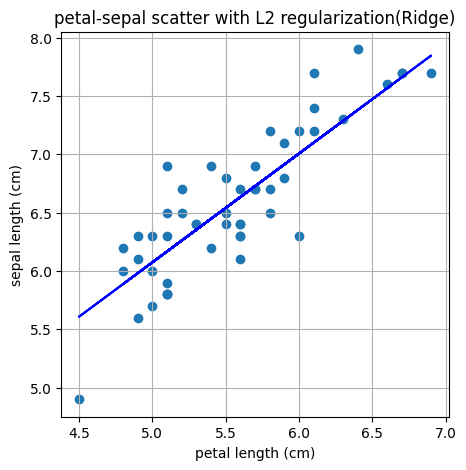

In [8]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


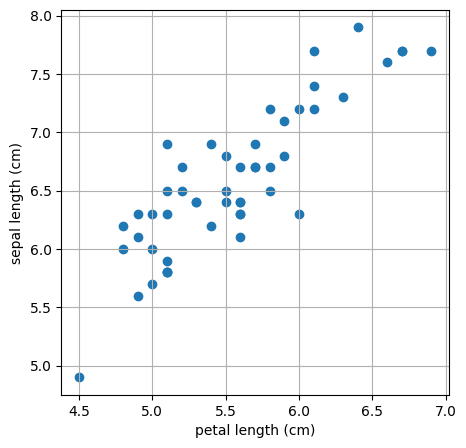

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

/tmp/ipython-input-2078159102.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))


기울기 : 0.00, 절편 : 6.59


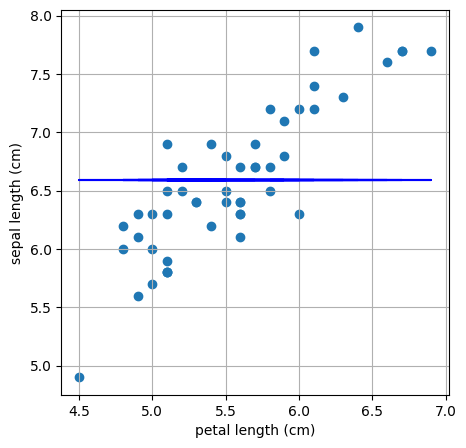

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [13]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.2512897393972267
Mean Squared Error: 0.10624587409525586
Mean Root Squared Error: 0.3259537913497186


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [16]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

Result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [2]:
%%time
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]
CPU times: user 206 ms, sys: 18.7 ms, total: 225 ms
Wall time: 388 ms


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [3]:
%%time
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
 -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
  9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
 -5.73136185e-04]
CPU times: user 16.5 ms, sys: 902 µs, total: 17.4 ms
Wall time: 57.5 ms


In [14]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([1,10,1,1,1])
p = 5
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x)
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [15]:
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


In [16]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)

result one norm of A : 14.0
result inf norm of A : 18.0


In [17]:
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('=3')

=3


In [18]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
X = train_dataset.data.numpy().astype(np.float32) / 255.0
y = train_dataset.targets.numpy().astype(np.int64)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 267kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.98MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.6MB/s]


In [19]:
X_train = torch.from_numpy(X).view(-1, 28*28)  # Flatten
y_train = torch.from_numpy(y)

batch_size = 64

In [20]:
class ClassifierModel(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [21]:
def train(model, X_train, y_train, criterion, optimizer, batch_size, epochs=5):
    start = time.time()
    model.train()
    num_samples = X_train.size(0)

    for epoch in range(epochs):
        permutation = torch.randperm(num_samples)  # 데이터 섞기 (Epoch마다)

        total_loss = 0
        correct = 0
        for i in range(0, num_samples, batch_size):
            idx = permutation[i:i+batch_size]
            images, labels = X_train[idx].to(device), y_train[idx].to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, preds = outputs.max(1)
            correct += preds.eq(labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}] - Loss: {total_loss:.4f}, Accuracy: {100. * correct / num_samples:.2f}%")

    print(f"\n⏱ Total Time: {time.time() - start:.2f} seconds")

In [22]:
%%time
model_with_dropout = ClassifierModel(dropout_rate=0.9).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_with_dropout.parameters(), lr=0.001)

train(model_with_dropout, X_train, y_train, criterion, optimizer, batch_size=batch_size, epochs=5)


Epoch [1/5] - Loss: 1181.0872, Accuracy: 49.67%
Epoch [2/5] - Loss: 1005.3757, Accuracy: 56.03%
Epoch [3/5] - Loss: 957.0766, Accuracy: 57.83%
Epoch [4/5] - Loss: 938.1154, Accuracy: 58.93%
Epoch [5/5] - Loss: 930.3854, Accuracy: 59.53%

⏱ Total Time: 16.09 seconds
CPU times: user 15.7 s, sys: 7.88 ms, total: 15.7 s
Wall time: 16.1 s


In [23]:
%%time
model_without_dropout = ClassifierModel(dropout_rate=0).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_dropout.parameters(), lr=0.001)

train(model_without_dropout, X_train, y_train, criterion, optimizer, epochs=5)

TypeError: train() missing 1 required positional argument: 'batch_size'

In [24]:
train_size = int(0.99 * len(X))
valid_size = len(X) - train_size
train_data, valid_data, train_label, valid_label = train_test_split(X, y, test_size=0.01, random_state=42)

X_train = torch.from_numpy(train_data).reshape(-1, 28*28)
y_train = torch.from_numpy(train_label)
X_valid = torch.from_numpy(valid_data).reshape(-1, 28*28)
y_valid = torch.from_numpy(valid_label)

In [25]:
class OverfitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [26]:
def train(model, X_train, y_train, X_valid, y_valid, criterion, optimizer, batch_size = batch_size, epochs=200):
    train_loss, valid_loss, train_acc, valid_acc = [], [], [], []
    model.train()
    num_train = X_train.size(0)
    num_valid = X_valid.size(0)

    for epoch in range(epochs):
        permutation = torch.randperm(num_train)
        total_loss = 0
        correct_train, total_train = 0, 0

        for i in range(0, num_train, batch_size):
            idx = permutation[i:i+batch_size]
            images, labels = X_train[idx].to(device), y_train[idx].to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_loss.append(total_loss / num_train // batch_size)
        train_acc.append(100 * correct_train / total_train)

        # === validation ===
        model.eval()
        temp_loss, correct_valid, total_valid = 0, 0, 0
        with torch.no_grad():
            for i in range(0, num_valid, batch_size):
                images, labels = X_valid[i:i+batch_size].to(device), y_valid[i:i+batch_size].to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                temp_loss += loss.item()

                _, predicted = outputs.max(1)
                total_valid += labels.size(0)
                correct_valid += predicted.eq(labels).sum().item()

        valid_loss.append(temp_loss / num_valid // batch_size)
        valid_acc.append(100 * correct_valid / total_valid)
        model.train()

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Valid Loss: {valid_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, Valid Acc: {valid_acc[-1]:.2f}%")
    return train_loss, valid_loss, train_acc, valid_acc

In [27]:
%%time
# Dropout이 없는 모델 학습
model_overfit = OverfitModel().to(device)
optimizer = optim.Adam(model_overfit.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_overfit, X_train, y_train, X_valid, y_valid, criterion, optimizer, batch_size=64, epochs=200)


Epoch [1/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 81.67%, Valid Acc: 86.00%
Epoch [2/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 86.39%, Valid Acc: 88.33%
Epoch [3/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.74%, Valid Acc: 88.17%
Epoch [4/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 88.48%, Valid Acc: 90.33%
Epoch [5/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 89.09%, Valid Acc: 88.33%
Epoch [6/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 89.70%, Valid Acc: 89.67%
Epoch [7/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 90.14%, Valid Acc: 91.33%
Epoch [8/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 90.54%, Valid Acc: 90.33%
Epoch [9/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 90.87%, Valid Acc: 89.67%
Epoch [10/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 91.20%, Valid Acc: 88.50%
Epoch [11/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 91.51%, Vali

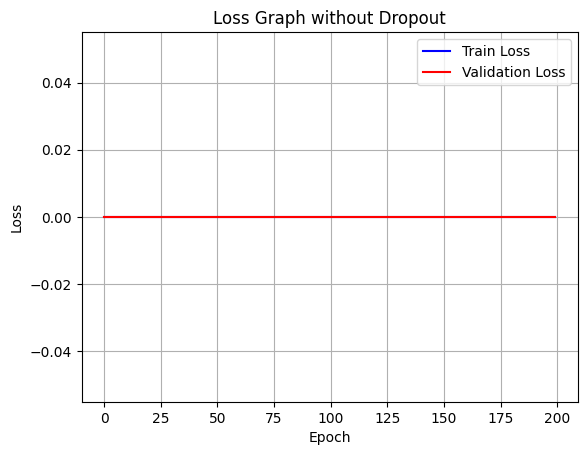

In [28]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

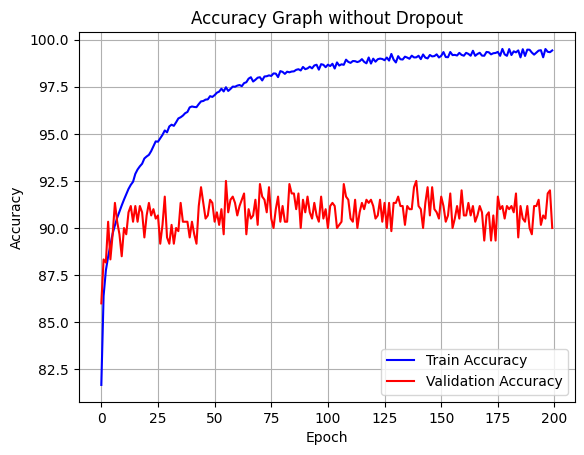

In [29]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [30]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)
class DropModel(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [31]:
%%time
model_dropout = DropModel(dropout_rate=0.5).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dropout.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_dropout, X_train, y_train, X_valid, y_valid, criterion, optimizer, batch_size = batch_size, epochs = 200)

Epoch [1/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 78.93%, Valid Acc: 84.33%
Epoch [2/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 84.04%, Valid Acc: 87.00%
Epoch [3/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 85.20%, Valid Acc: 87.17%
Epoch [4/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 85.96%, Valid Acc: 88.67%
Epoch [5/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 86.28%, Valid Acc: 89.83%
Epoch [6/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 86.64%, Valid Acc: 89.50%
Epoch [7/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.04%, Valid Acc: 88.83%
Epoch [8/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.35%, Valid Acc: 90.00%
Epoch [9/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.41%, Valid Acc: 90.50%
Epoch [10/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.64%, Valid Acc: 90.50%
Epoch [11/200], Train Loss: 0.0000, Valid Loss: 0.0000, Train Acc: 87.88%, Vali

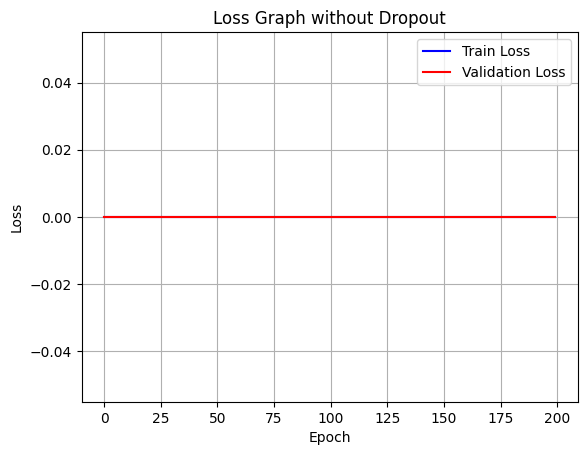

In [32]:
# Q. loss 값의 그래프를 그려봅시다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

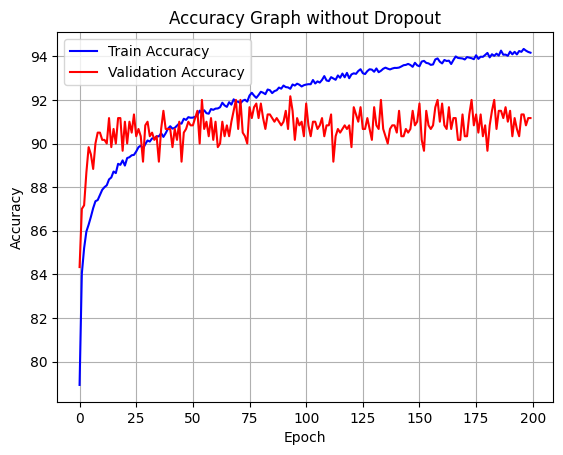

In [33]:
# Q. accuracy 값의 그래프를 그려봅시다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy Graph without Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('=3')

=3


In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

In [36]:
train_size = int(0.7 * len(train_dataset))
valid_size = len(train_dataset) - train_size
train_data, valid_data = random_split(train_dataset, [train_size, valid_size])

train_loader = DataLoader(train_data, batch_size=2048, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=2048, shuffle=False)

In [37]:
class ComparisonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [38]:
def train(model, train_loader, valid_loader, criterion, optimizer, epochs=20):
    train_loss, valid_loss, train_acc, valid_acc = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss, correct_train, total_train = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total_train += labels.size(0)
            correct_train += predicted.eq(labels).sum().item()

        train_loss.append(total_loss / total_train)
        train_acc.append(100 * correct_train / total_train)

        model.eval()
        temp_loss, correct_valid, total_valid = 0, 0, 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)
                temp_loss += loss.item() * images.size(0)

                _, predicted = outputs.max(1)
                total_valid += labels.size(0)
                correct_valid += predicted.eq(labels).sum().item()

        valid_loss.append(temp_loss / total_valid)
        valid_acc.append(100 * correct_valid / total_valid)

        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Valid Loss: {valid_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.2f}%, Valid Acc: {valid_acc[-1]:.2f}%")

    return train_loss, valid_loss, train_acc, valid_acc

In [39]:
%%time
model_no_bn = ComparisonModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_no_bn.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_no_bn, train_loader, valid_loader, criterion, optimizer, epochs=20)

Epoch [1/20], Train Loss: 1.1662, Valid Loss: 0.6716, Train Acc: 63.00%, Valid Acc: 75.92%
Epoch [2/20], Train Loss: 0.6104, Valid Loss: 0.5454, Train Acc: 77.96%, Valid Acc: 80.74%
Epoch [3/20], Train Loss: 0.5236, Valid Loss: 0.4952, Train Acc: 81.45%, Valid Acc: 82.54%
Epoch [4/20], Train Loss: 0.4826, Valid Loss: 0.4658, Train Acc: 83.20%, Valid Acc: 83.56%
Epoch [5/20], Train Loss: 0.4590, Valid Loss: 0.4479, Train Acc: 84.00%, Valid Acc: 84.15%
Epoch [6/20], Train Loss: 0.4398, Valid Loss: 0.4324, Train Acc: 84.68%, Valid Acc: 84.60%
Epoch [7/20], Train Loss: 0.4223, Valid Loss: 0.4165, Train Acc: 85.29%, Valid Acc: 85.31%
Epoch [8/20], Train Loss: 0.4108, Valid Loss: 0.4057, Train Acc: 85.69%, Valid Acc: 85.53%
Epoch [9/20], Train Loss: 0.3976, Valid Loss: 0.3978, Train Acc: 86.17%, Valid Acc: 85.84%
Epoch [10/20], Train Loss: 0.3882, Valid Loss: 0.3931, Train Acc: 86.51%, Valid Acc: 85.80%
Epoch [11/20], Train Loss: 0.3805, Valid Loss: 0.3838, Train Acc: 86.68%, Valid Acc: 86.3

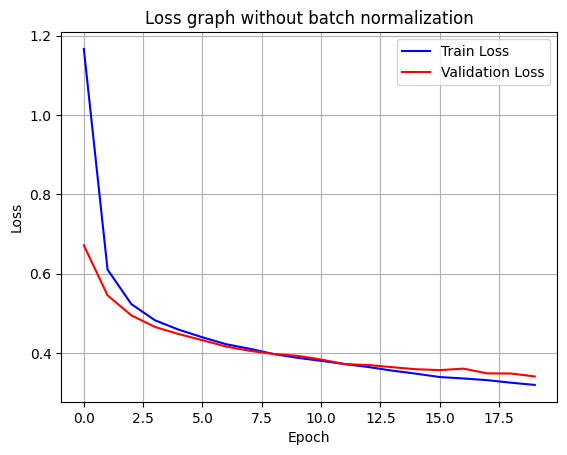

In [40]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss graph without batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

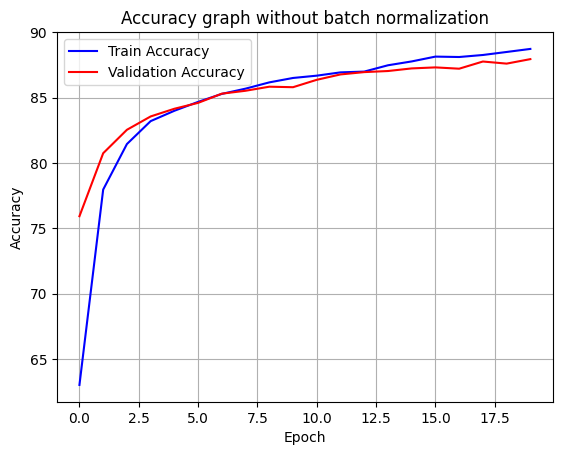

In [41]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy graph without batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [42]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

class BatchNormModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.batch_norm(x)
        x = self.fc2(x)
        return x

In [43]:
%%time
model_bn = BatchNormModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_bn.parameters(), lr=0.001)
train_loss, valid_loss, train_acc, valid_acc = train(model_bn, train_loader, valid_loader, criterion, optimizer, epochs=20)

Epoch [1/20], Train Loss: 0.9227, Valid Loss: 0.6510, Train Acc: 69.79%, Valid Acc: 78.62%
Epoch [2/20], Train Loss: 0.5563, Valid Loss: 0.5173, Train Acc: 81.23%, Valid Acc: 82.88%
Epoch [3/20], Train Loss: 0.4730, Valid Loss: 0.4597, Train Acc: 83.75%, Valid Acc: 84.67%
Epoch [4/20], Train Loss: 0.4293, Valid Loss: 0.4197, Train Acc: 85.16%, Valid Acc: 85.80%
Epoch [5/20], Train Loss: 0.3979, Valid Loss: 0.4038, Train Acc: 86.22%, Valid Acc: 86.23%
Epoch [6/20], Train Loss: 0.3748, Valid Loss: 0.3920, Train Acc: 86.88%, Valid Acc: 86.33%
Epoch [7/20], Train Loss: 0.3550, Valid Loss: 0.3693, Train Acc: 87.54%, Valid Acc: 87.27%
Epoch [8/20], Train Loss: 0.3369, Valid Loss: 0.3534, Train Acc: 88.18%, Valid Acc: 87.84%
Epoch [9/20], Train Loss: 0.3226, Valid Loss: 0.3511, Train Acc: 88.69%, Valid Acc: 87.85%
Epoch [10/20], Train Loss: 0.3129, Valid Loss: 0.3534, Train Acc: 89.12%, Valid Acc: 87.51%
Epoch [11/20], Train Loss: 0.3038, Valid Loss: 0.3433, Train Acc: 89.36%, Valid Acc: 87.8

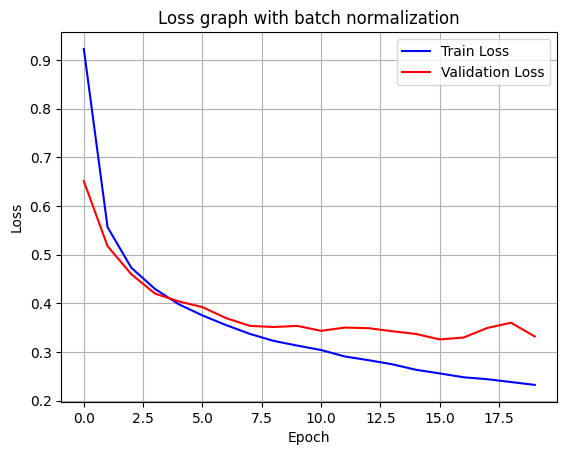

In [44]:
# loss 값을 plot 해보겠습니다.
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(valid_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Loss graph with batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

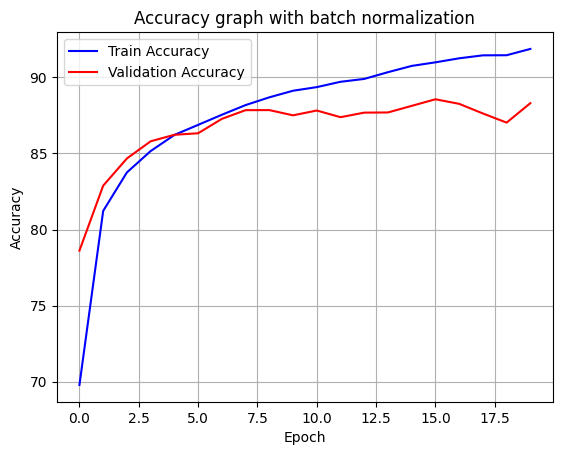

In [45]:
# accuracy 값을 plot 해보겠습니다.
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(valid_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Accuracy graph with batch normalization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.show()